# Simple classification problem

The following is an example notebook with classification problem. The data science problem here is kept intentionally small and trivial to understand. This is because we don't want you to focus on the data science problem, but to think about all kinds of ML Engineering challenges that might happen in production scenarios.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier


Read initial data

In [2]:
df = pd.read_csv(
    "data/historical_sensor_data.csv",
    sep=','
)
df.head()

,sensor_1,sensor_2,label
0,-0.940230,1.411390,0.0
1,0.266017,0.474068,0.0
2,1.912074,0.456729,1.0
3,0.414918,-0.504954,0.0
4,1.925371,0.129880,1.0


Data exploration

In [3]:
X = df[['sensor_1', 'sensor_2']].values
y = df[['label',]].values
print(X.shape)
print(y.shape)

(1500, 2)
(1500, 1)


Preprocess and obtain train and test data

In [4]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=99
)
h = 0.02 # meshgrid
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Plot the data

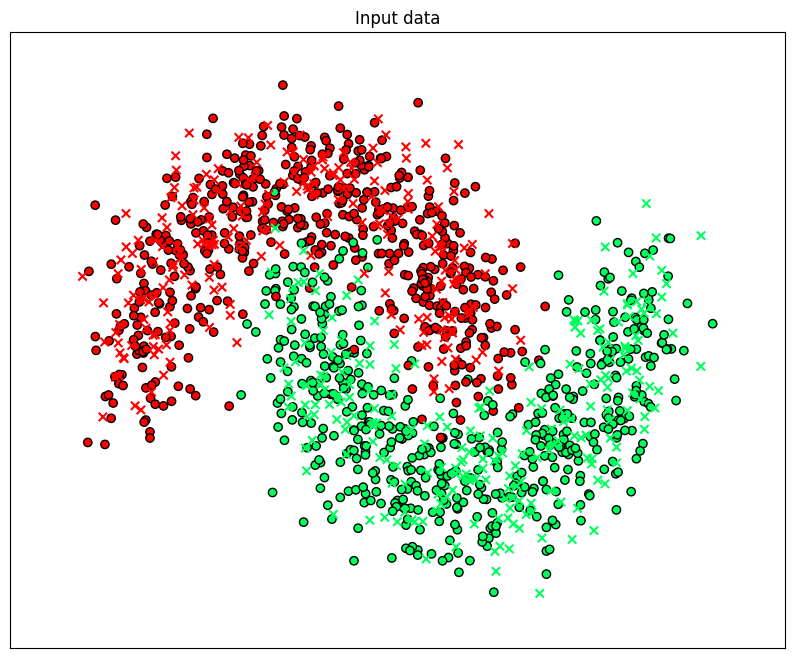

In [5]:
# just plot the dataset first
plt.figure(figsize=(10,8))
cm = plt.cm.PiYG
cm_bright = ListedColormap(["#FF0000", "#00ff5e"])
plt.title("Input data")
    
# Plot the training points
plt.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
)
# Plot the testing points
plt.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, marker='x',  cmap=cm_bright, alpha=1 
)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


Create and train model

In [6]:
clf = GaussianProcessClassifier(1.0 * RBF(1.0))
clf.fit(X_train, y_train.ravel())
score = clf.score(X_test, y_test)


Run Inference

In [7]:
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

Plot results of the inference

Text(2.4285906846024554, -2.5794945523084336, 'score = 0.98')

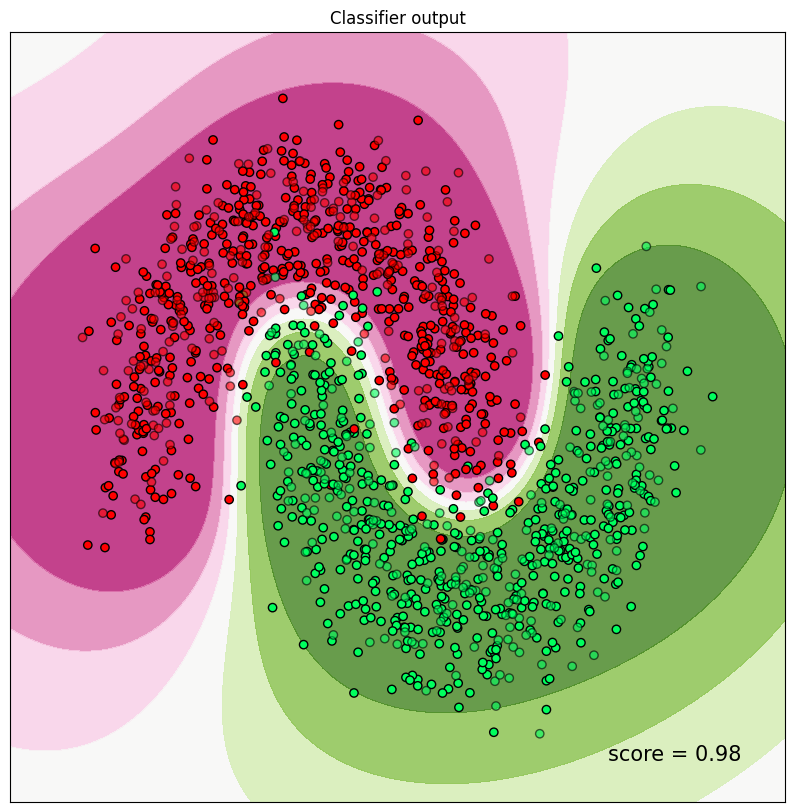

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

# Plot the training points
ax.scatter(
    X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
)
# Plot the testing points
ax.scatter(
    X_test[:, 0],
    X_test[:, 1],
    c=y_test,
    cmap=cm_bright,
    edgecolors="k",
    alpha=0.6,
)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Classifier output")
ax.text(
    xx.max() - 0.3,
    yy.min() + 0.3,
    (f"score = {score:.2f}").lstrip("0"),
    size=15,
    horizontalalignment="right",
)

# Inference

Classification of the latest sensor data

## read the latest data

In [9]:

inference_df = pd.read_csv(
    "data/latest_sensor_data.csv",
    sep=','
)
X_inference = inference_df.values
inference_df.head()

,sensor_1,sensor_2
0,1.662361,0.465601
1,2.335964,0.670073
2,1.143369,0.732111
3,1.629260,1.322346
4,0.816851,1.795098


## predict labels

In [10]:
# predict labels
y_pred = clf.predict_proba(X_inference)[:, 1]
inference_df = inference_df.assign(y_pred = np.round(y_pred, 0))
inference_df.head()

,sensor_1,sensor_2,y_pred
0,1.662361,0.465601,1.0
1,2.335964,0.670073,1.0
2,1.143369,0.732111,1.0
3,1.629260,1.322346,1.0
4,0.816851,1.795098,0.0


# plot inference results

Text(0.5, 1.0, 'Classifier inference output')

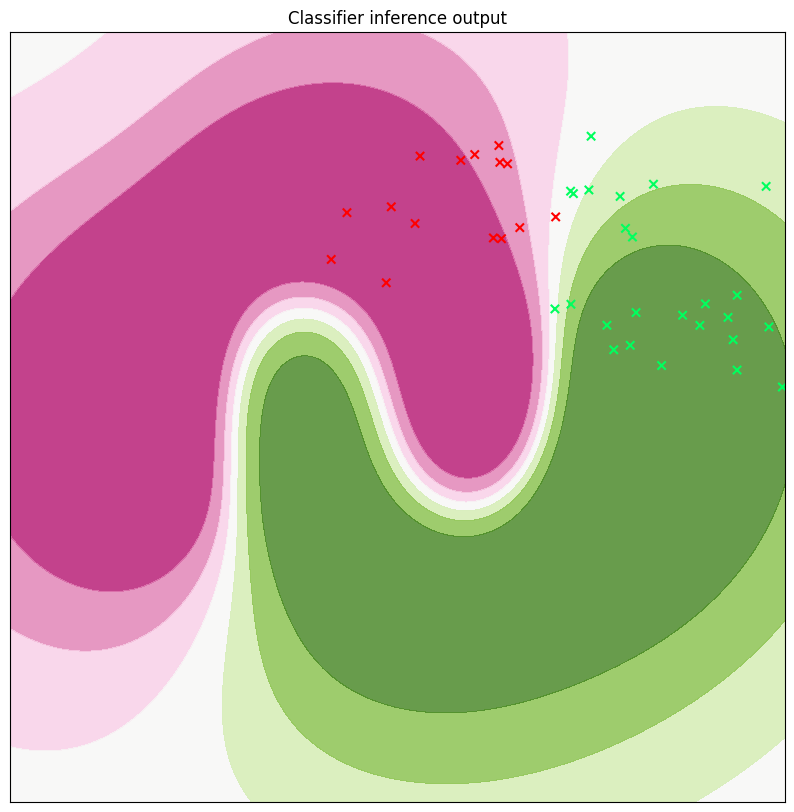

In [11]:
fig, ax = plt.subplots(figsize=(10,10))

ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

# Plot the inference points
ax.scatter(
    X_inference[:, 0], X_inference[:, 1], marker="x", c=y_pred, cmap=cm_bright
)

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())

ax.set_title("Classifier inference output")
